# Préparation et modélisation des données

In [12]:
# Import des bibliothèques 
from sklearn import neighbors
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Import dictionnaire des données
digits = datasets.load_digits()

# Sauvegarde DataFrame des données dans l'attribut data de digits
X_digits = pd.DataFrame(digits.data)
# Sauvegarde Dataframe les labels dans l'attribut target
y_digits = digits.target

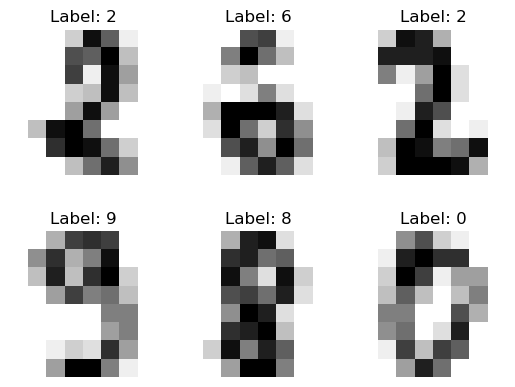

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm # pour importer de nouvelles cartes de couleur

j=0

for i in np.random.choice(np.arange(0, len(y_digits)), size=6):
    j=j+1
#On stocke l'indice dans la liste i pour pouvoir afficher le label correspondant plus tard.
    
    plt.subplot(2,3,j)
# Rajouter *plt.subplot(2,3,j)* à chaque itération permet d'afficher toutes les images
# ensembles sur la même figure.

    plt.axis('off')
# Permet de supprimer les axes (ici sert à mieux voir les titres)
    
    plt.imshow(digits.images[i],cmap = cm.binary, interpolation='None')
# Affiche l'image n°i
# L'utilisation de cm.binary permet de voir les chiffres en gris sur fond blanc.

    plt.title('Label: %i' %y_digits[i])
# Pour chaque image on écrit en titre le label qui lui correspond. 


In [14]:
# Division des matrices
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=126)


# Apprentissage des données

In [15]:
# Création du classifieur et construction du modèle sur les données d'entraînement
knn = neighbors.KNeighborsClassifier(n_neighbors=7, metric='minkowski')
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

# Evaluation du modèle de classification


In [30]:
# Convertir X_test en un tableau NumPy
X_test= X_test.values

# Vérifiez la contiguïté des données
print(X_test.flags.c_contiguous)

# Maintenant, appelez la méthode predict avec X_test_numpy
y_pred = knn.predict(X_test)


pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])


False


Classe prédite,0,1,2,3,4,5,6,7,8,9
Classe réelle,,,,,,,,,,
0,32,0,0,0,0,0,0,0,0,0
1,0,54,0,0,0,0,0,0,0,0
2,0,0,38,0,0,0,0,0,0,0
3,0,0,0,28,0,0,0,0,0,0
4,0,0,0,0,41,0,0,0,0,0
5,0,0,0,0,0,41,1,0,0,1
6,0,0,0,0,0,0,35,0,0,0
7,0,0,0,0,0,0,0,27,0,0
8,0,0,0,0,0,0,0,0,34,0


In [31]:
#Création du nouveau classificateur et entraînement du modèle
knn_m = neighbors.KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_m.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan')

In [33]:
#Score du modèle utilisant la distance de Minkowski
score_minkowski = knn.score(X_test, y_test)

#Score du modèle utilisant la distance de Manhattan
score_manhattan = knn_m.score(X_test, y_test)

score_minkowski, score_manhattan

(0.9861111111111112, 0.9861111111111112)

In [35]:
score_minko = []
score_man = []
score_cheb = []

for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score_minko.append(knn.score(X_test, y_test))

for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    score_man.append(knn.score(X_test, y_test))
    
for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    score_cheb.append(knn.score(X_test, y_test))


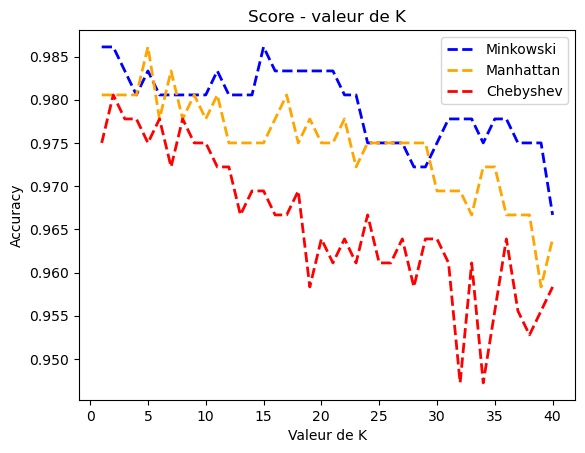

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, 41), score_minko, color='blue', linestyle='dashed', lw=2, label='Minkowski')
plt.plot(range(1, 41), score_man, color='orange', linestyle='dashed', lw=2, label='Manhattan')
plt.plot(range(1, 41), score_cheb, color='red', linestyle='dashed', lw=2, label='Chebyshev')
plt.title('Score - valeur de K')  
plt.xlabel('Valeur de K')  
plt.ylabel('Accuracy') 
plt.legend();

L'algorithme k-NN est simple mais puissant. L'avantage est qu'il ne requiert aucun entraînement de modèle pour réaliser des prédictions, alors que c'est en général la partie la plus compliquée d'un algorithme de Machine Learning.
Il est utilisé dans de nombreux domaines, notamment : la reconnaissance de formes, les algorithmes de compression, le marketing ciblé.

En revanche, c'est un classifieur très gourmand en mémoire, sensible aux attributs non pertinents et corrélés.
Pour un jeu de données de grande dimension, la prédiction sera lente car l'algorithme parcourt, pour chaque individu à classer, l'ensemble des données de l'échantillon d'apprentissage.